In [ ]:
import matplotlib.pyplot as plt
from math import pi

In [ ]:
T = 1000
t = [i for i in range(T)]

q1_i = 0
q1_f = 3 * pi / 4

q2_i = 0
q2_f = -pi / 2

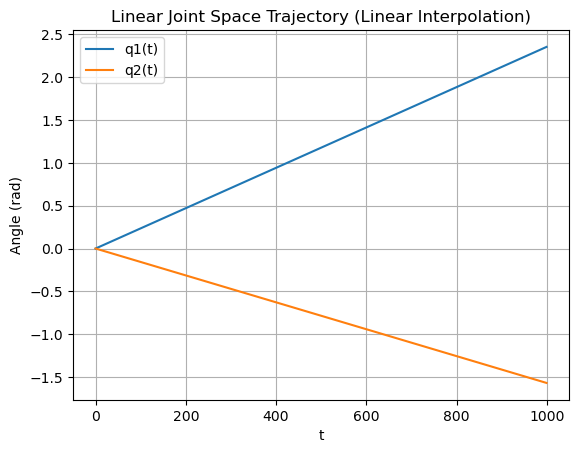

In [ ]:
# Linear Interpolation
q1_t = [q1_i + ((q1_f - q1_i) * ti)/T for ti in t]
q2_t = [q2_i + ((q2_f - q2_i) * ti)/T for ti in t]


plt.figure()
plt.plot(t, q1_t, label="q1(t)")
plt.plot(t, q2_t, label="q2(t)")
plt.title("Linear Joint Space Trajectory (Linear Interpolation)")
plt.xlabel("t")
plt.ylabel("Angle (rad)")
plt.legend()
plt.grid(True)
plt.show()

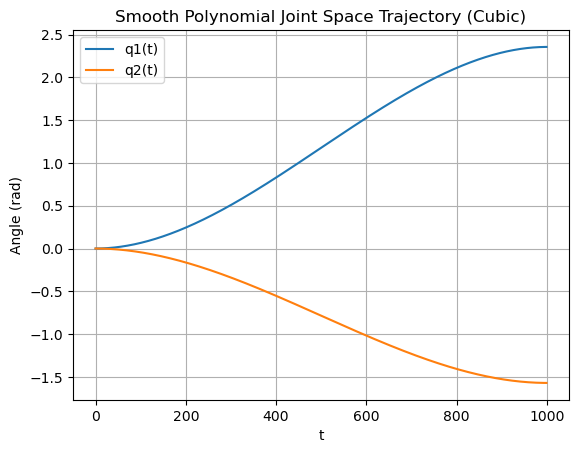

In [11]:
# Cubic smooth polynomial trajectory

q1_t = [q1_i + (3/(T*T))*(q1_f - q1_i)*ti*ti - (2/(T*T*T))*(q1_f - q1_i)*ti*ti*ti for ti in t]
q2_t = [q2_i + (3/(T*T))*(q2_f - q2_i)*ti*ti - (2/(T*T*T))*(q2_f - q2_i)*ti*ti*ti for ti in t]

plt.figure()
plt.plot(t, q1_t, label="q1(t)")
plt.plot(t, q2_t, label="q2(t)")
plt.title("Smooth Polynomial Joint Space Trajectory (Cubic)")
plt.xlabel("t")
plt.ylabel("Angle (rad)")
plt.legend()
plt.grid(True)
plt.show()

# Cubic Joint-Space Trajectory Derivation
*(Zero initial and final velocity)*

#### 1. Trajectory Assumption

Assume a cubic polynomial for joint position:

\[
q(t) = a_0 + a_1 t + a_2 t^2 + a_3 t^3
\]

Velocity:

\[
\dot{q}(t) = a_1 + 2 a_2 t + 3 a_3 t^2
\]

---

#### 2. Boundary Conditions

Given:
- Initial time: \( t = 0 \)
- Final time: \( t = T \)

\[
\begin{aligned}
q(0) &= q_i \\
q(T) &= q_f \\
\dot{q}(0) &= 0 \\
\dot{q}(T) &= 0
\end{aligned}
\]

---

#### 3. Conditions at \( t = 0 \)

\[
a_0 = q_i
\]

\[
a_1 = 0
\]

---

#### 4. Conditions at \( t = T \)

Position:
\[
a_2 T^2 + a_3 T^3 = q_f - q_i
\]

Velocity:
\[
2 a_2 T + 3 a_3 T^2 = 0
\]

---

#### 5. Solving for Coefficients

\[
a_3 = -\frac{2 (q_f - q_i)}{T^3}
\]

\[
a_2 = \frac{3 (q_f - q_i)}{T^2}
\]

---

#### 6. Final Coefficients

\[
\boxed{
\begin{aligned}
a_0 &= q_i \\
a_1 &= 0 \\
a_2 &= \frac{3 (q_f - q_i)}{T^2} \\
a_3 &= -\frac{2 (q_f - q_i)}{T^3}
\end{aligned}
}
\]

---

#### 7. Final Trajectory

\[
q(t) = q_i
+ 3 \frac{(q_f - q_i)}{T^2} t^2
- 2 \frac{(q_f - q_i)}{T^3} t^3
\]



## Observations:

Linear trajectory is abrupt, and starts and ends with a non-zero velocity and acceleration. Meanwhile, the cubic polynomial is much smoother, with zero intial and final velocities. This ensures that the arm smoothly moves from the initial to the final position without any abrupt jerks. Thus, in practical applications, linear joint space trajectories are seldom used as it may lead to excessive wear and tear and motor damage. 